In [1]:
import os
from anthropic import Anthropic
from dotenv import load_dotenv

Pass the api key in the brackets 
- client = Anthropic(ANTHROPIC_API_KEY="abc")
- if not filled in and just () it will look for an environmental key called ANTHROPIC_API_KEY

In [2]:
load_dotenv()
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
os.environ['ANTHROPIC_API_KEY'] = anthropic_api_key
if anthropic_api_key:
    print(f"ANTHROPIC_API_KEY Key exists and begins {anthropic_api_key[:8]}")
else:
    print("ANTHROPIC_API_KEYKey not set")

client = Anthropic()

ANTHROPIC_API_KEY Key exists and begins sk-ant-a


In [3]:
MODEL_NAME="claude-3-5-sonnet-20241022"
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1000,
    messages=[
        {"role": "user", "content": "Write a haiku about Syville Designs"}
    ]
)
print(response.content[0].text)

Here's a haiku about Syville Designs:

Crafted with pure style
Syville's vision takes its flight
Beauty found in form


In [4]:
response

Message(id='msg_01G9gv75LG9r6JBegmJhWECn', content=[TextBlock(text="Here's a haiku about Syville Designs:\n\nCrafted with pure style\nSyville's vision takes its flight\nBeauty found in form", type='text')], model='claude-3-5-sonnet-20241022', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, input_tokens=17, output_tokens=36))

*** Response is a list:  ***
Message(id='msg_01KxW9UWVuz95juzdw3dcTLo', 
content=[TextBlock(text="Here's a haiku about Syville Designs:\n\nCreative designs\nCrafting beauty day by day\nStyle with purpose flows", type='text')], 
    model='claude-3-5-sonnet-20241022', 
    role='assistant', 
    stop_reason='end_turn',   the model stopped generating as it reached a natural stopping point
    stop_sequence=None, 
    type='message', 
    usage=Usage(cache_creation_input_tokens=0, cache_read_input_tokens=0, ***input_tokens=17, output_tokens=31))***

In [5]:
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=1000,
    messages=[
        {"role": "user", "content": "Hello! Only speak to me in Spanish"},
        {"role": "assistant", "content": "Hola!"},
        {"role": "user", "content": "How are you?"}
    ]
)
print(response.content[0].text)
print(response.model)
print(response.role)
print(response.stop_reason)
print(response.usage.input_tokens)
print(response.usage.output_tokens)

¡Estoy muy bien, gracias! ¿Y tú, cómo estás?
claude-3-5-sonnet-20241022
assistant
end_turn
29
28


*** simple chatbot ***

In [ ]:
print("Simple Chatbot (type 'quit' to exit)")
# Store conversation history
messages = []
while True:
    # Get user input
    user_input = input("You: ")
    # Check for quit command
    if user_input.lower() == 'quit':
        print("Goodbye!")
        break
    # Add user message to history
    messages.append({"role": "user", "content": user_input})
    try:
        # Get response from Claude
        response = client.messages.create(
            model=MODEL_NAME,
            max_tokens=200,                 ## max tokens in output!
            messages=messages
        )
        # Extract and print Claude's response
        asst_message = response.content[0].text
        print("Assistant:", asst_message)
        
        # Add assistant response to history
        messages.append({"role": "assistant", "content": asst_message})
        
    except Exception as e:
        print(f"An error occurred: {e}")

Simple Chatbot (type 'quit' to exit)
Assistant: Hello! How can I help you today?
Assistant: I should be clear that there's no guaranteed way to "get rich quick" - most such schemes are either scams or highly risky. Instead, I'd encourage:

1. Steady wealth building through:
- Consistent saving and investing
- Learning financial literacy
- Building valuable skills
- Living below your means
- Contributing to retirement accounts

2. Legitimate ways to increase income:
- Education/training for higher-paying jobs
- Starting a business (though this takes time)
- Side hustles/freelancing
- Asking for raises/promotions
- Real estate investment (with proper research)

Be very wary of:
- Multi-level marketing schemes
- Get-rich-quick investment promises
- Cryptocurrency speculation
- Gambling
- Any offer that seems too good to be true

Building wealth typically takes time, patience, and smart financial decisions. Would you like more specific information about any of these legitimate approaches
A

### Prefilling the Assistant Response  
***Setting the answer from the assistant***  
by starting the assistent role, it will start with that token, but keep in mind that hte token(s) are not returned as part of the assistant.


In [ ]:
# response = client.messages.create(
#     model=MODEL_NAME,
#     max_tokens=1000,
#     messages=[
#         {"role": "user", "content": "Write a short poem about pigs"},
#         {"role": "assistant", "content": "Oink"}
#     ]
# )


response = client.messages.create(
    model = MODEL_NAME,
    max_tokens = 500,
    messages = [
        {"role":"user","content":"Write a short poem about pigs"},
        {"role":"assistant","content":"Oink"}
    ]
)
print(response.content[0].text)
prompt = """
Generate a numbered, ordered list of technical topics 
I should learn if I want to work on LLMs
"""
response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=500,
    stop_sequences=["4."],
    messages=[{"role": "user", "content": prompt}],
)
print(response.content[0].text)

, oink in the mud,
I'm a pig, I know what's good.
Rolling, splashing, having fun,
Cooling off in summer's sun.

Pink and plump with curly tail,
Sniffing treats without fail.
Smart and friendly, that is true,
Making friends with me and you.


### Model Parameters
max_tokens = upper bound to generated text. (see the response stop_reason ='max_tokens')  --> it's not writing a upper_bound , it's cutting the response.  
stop_sequences = list stop on the generation of the token.   
temperature = 0 - 1 : determines the variance of the generation. 0 is almost deterministic, 1 is wide variation in a wording  


### Multi Modal  
Deconstructing the message   
```markdown
```python
messages = [  
    {  
        "role": "user",  
        "content": "tell me a joke"  
    }  
]  

messages = [
    {
        "role": "user",

        "content": [
            {"type": "text", "text": "tell me a joke"},
        ]
    }
]

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "who"},
            {"type": "text", "text": "made"},
            {"type": "text", "text": "you?"},
        ]
    }
]


In [35]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", 
             "text": "tell me a new joke, but not about scientist"},
        ]
    }
]

response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    temperature=1,
    max_tokens=200
)
print(response.content[0].text)

Here's a joke for you:

A man goes to the doctor and says, "Doc, I can't stop singing 'The Green, Green Grass of Home.'"

The doctor says, "That sounds like Tom Jones Syndrome."

"Is it common?" the man asks.

The doctor replies, "It's Not Unusual."


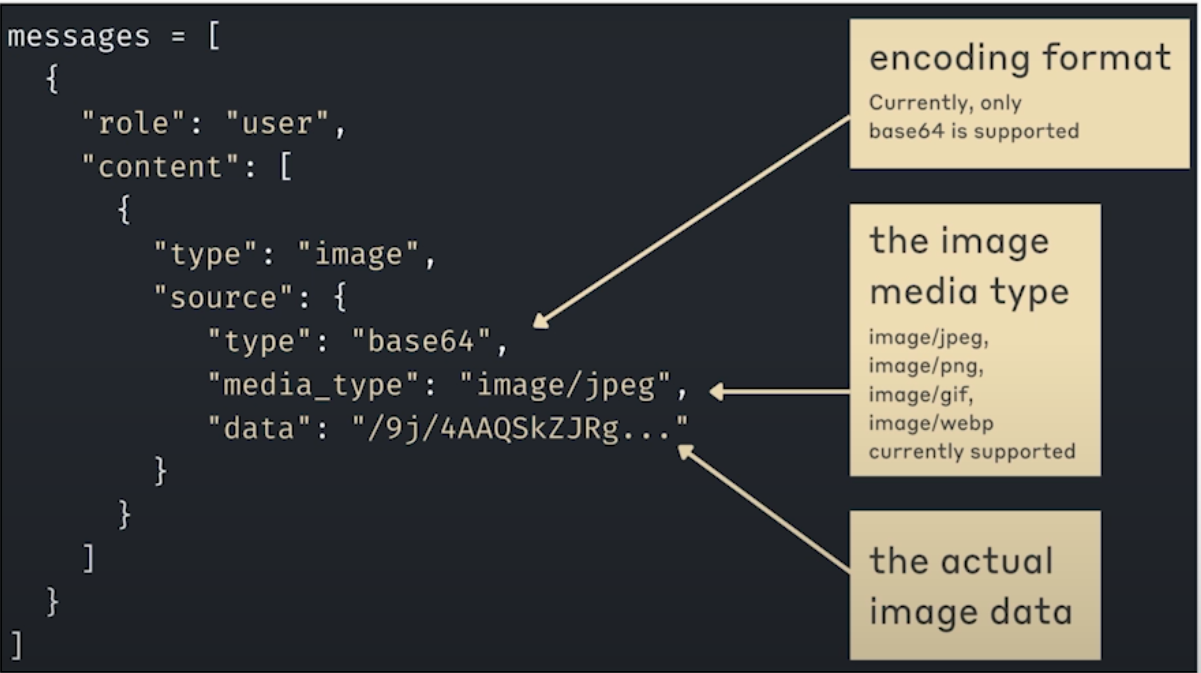

In [53]:
file_name = "art.png"

Current Directory: d:\Programs\LLM\projects\llm_engineering\Anthropic


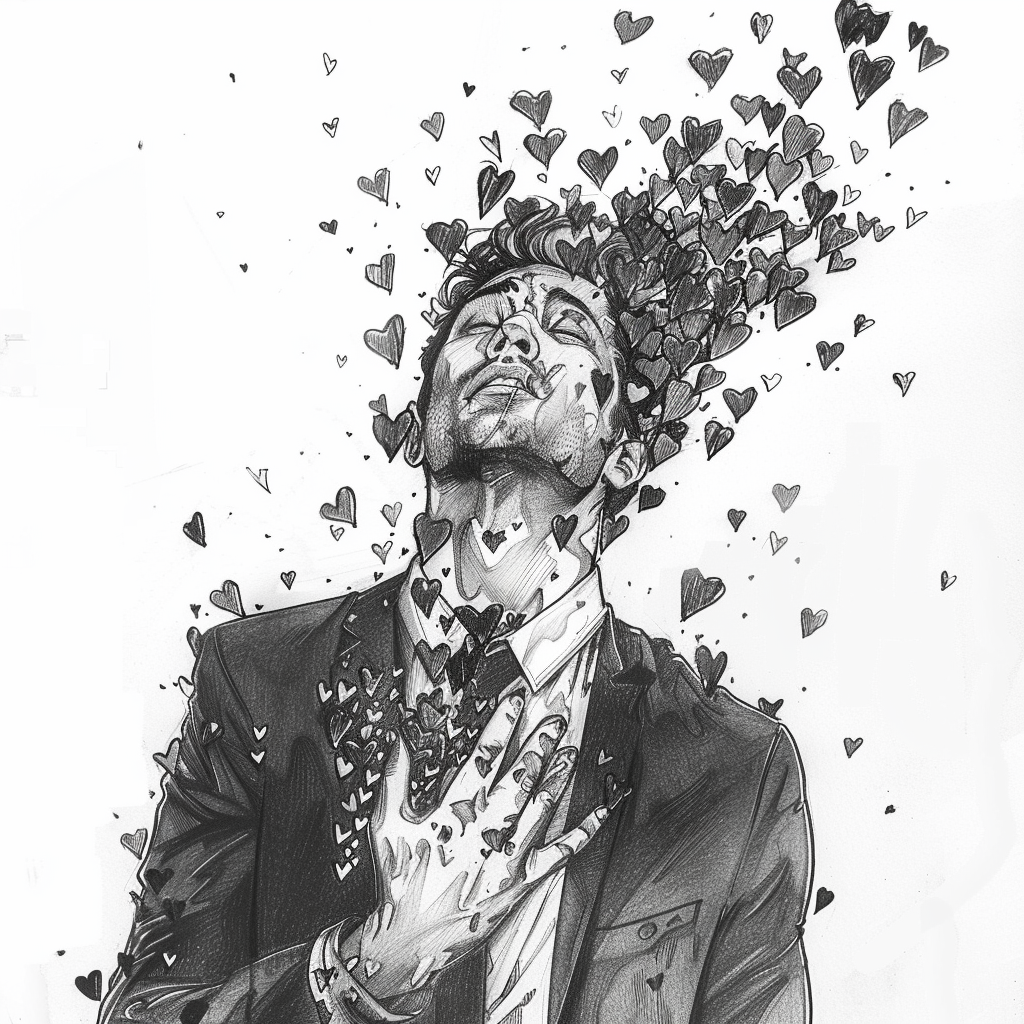

In [54]:
from IPython.display import Image
# Get the current working directory
current_directory = os.getcwd()

# Print the active directory location
print("Current Directory:", current_directory)
Image(filename=file_name) 

In [55]:
import base64
# opens the image file in "read binary" mode
with open(file_name, "rb") as image_file:
    #reads the contents of the image as a bytes object
    binary_data = image_file.read() 
    #encodes the binary data using Base64 encoding
    base_64_encoded_data = base64.b64encode(binary_data) 
    #decodes base_64_encoded_data from bytes to a string
    base64_string = base_64_encoded_data.decode('utf-8')


In [50]:
base64_string[:100]

'iVBORw0KGgoAAAANSUhEUgAABUIAAARlCAYAAAB85b03AAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAA'

In [56]:
messages = [
    {
        "role": "user",
        "content": [{
            "type": "image",
            "source": {
                "type": "base64",
                "media_type": "image/png",
                "data": base64_string
            },
        },
        {
            "type": "text",
            "text": "Describe what you see in this picture."
        }]
    }
]

In [57]:
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

This is a black and white pencil drawing showing a person wearing a suit jacket and dress shirt, with their head tilted upward in what appears to be a moment of joy or ecstasy. The most striking element is the abundance of small heart shapes (I estimate around 60-80 hearts) that seem to be emanating or dissolving from the figure's head and upper body. The hearts vary in size and shading, creating a beautiful dispersing effect. The artwork demonstrates excellent shading techniques and detail, particularly in the facial features and clothing folds. The composition creates a sense of movement and emotion, with the hearts floating upward and outward against the white background.

Main elements count:
1. One person
2. One suit jacket
3. One dress shirt
4. Approximately 60-80 heart shapes
5. Detailed hair rendering
6. White background

The overall effect creates a powerful artistic statement about love, joy
